# 比较Monte Carlo和黎曼积分的错误率

Translated and revised by Ru-Yuan Zhang from [LINK](https://nbviewer.org/github/gokererdogan/Notebooks/blob/master/Monte%20Carlo%20vs.%20Riemann.ipynb/)

蒙特卡洛积分的一个常被提及的优点是，误差率并不取决于输入空间的维度；它只取决于用于估计积分的样本数量。假设 $\int_{\mathcal{H}} f(x)$ 是我们要估计的积分。在蒙特卡罗积分中，我们使用从 $\mathcal{H}$ 中均匀抽取的样本来形成我们的估计值，如下所示

$$F_{mc} = \frac{1}{N}(\sum_i f(x_i))$$
如果让 $F$ 表示积分的真实值，根据大数定律，$F_{mc}$ 将接近 $F$。此外，我们估计值的方差为 $\frac{\sigma^2}{N}$ ，其中 $\sigma^2$ 是 $f(x)$ 的方差。因此，蒙特卡罗估计的误差为 $O(n^{-\frac{1}{2}})$。

在黎曼积分中，我们只需将 $\mathcal{H}$ 划分为 $N$ 等间距的区间，并通过以下方法简单估计积分
$$F_{r} = \frac{1}{N} \sum_i f(x_i) |H|$$
其中，$|H|$ 是积分域的大小。黎曼估计的误差变化为 $O(n^{-1})$，即比蒙特卡罗积分的误差率更高。

让我们先通过一个简单的例子来证明这一点。假设 $f(x) = (1 - ||x||_2^2)$ 其中 $x \in \mathbb{R}^D$。我们使用蒙特卡罗和黎曼积分来估计 $\int_0^1 f(x)$，并看看误差是如何变化的。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def grid(xl, xu, N, D):
    """
    Create a grid of N evenly spaced points in D-dimensional space
    xl: lower bound of x
    xu: upper bound of x
    N: number of points per dimension
    D: number of dimensions
    """
    xr = np.linspace(xl, xu, N)
    g = np.zeros((N**D, D))
    for n in range(N**D):
        index = np.unravel_index(n, tuple([N]*D))
        g[n] = [xr[i] for i in index]
        
    return g

def f(x):
    return (1 - (np.sum(np.square(x)) / x.size))

def riemann(N, D):
    # riemann integration
    x = grid(0.0, 1.0, N, D)
    dx = 1.0 / (N**D)
    F_r = np.sum(np.apply_along_axis(f, 1, x) * dx)
    return F_r

def monte_carlo(N, D):
    # monte carlo integration
    x = np.random.rand(N**D, D)
    F_mc = np.sum(np.apply_along_axis(f, 1, x)) / (N**D)
    return F_mc

D = 1
N = np.logspace(1, 3, num=10, dtype=int)

F_r = np.zeros(10)
for i,n in enumerate(N):
    F_r[i] = riemann(n, D)
    
# error in riemann estimate
e_r = np.abs(F_r - 2.0/3.0)
print(e_r)

[0.01851852 0.01111111 0.00641026 0.0037037  0.00219298 0.00130208
 0.00077882 0.00046555 0.00027871 0.00016683]


下面我们将绘制黎曼估计误差与样本点数量的关系图。从图中可以看出，误差随 $O(N^{-1})$ 变化。

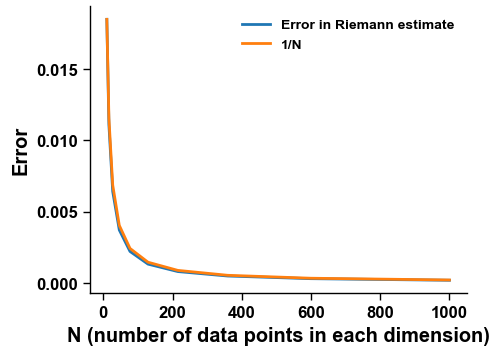

In [2]:
plt.plot(N, e_r)
plt.plot(N, (e_r[0]*N[0])/N)
plt.legend(['Error in Riemann estimate', '1/N'])
plt.xlabel('N (number of data points in each dimension)')
plt.ylabel('Error')
plt.show()

In [3]:
repeats = 1000
e_mc = np.zeros(10)
for i,n in enumerate(N):
    for r in range(repeats):
        e_mc[i] += np.abs(monte_carlo(n, D) - 2.0/3.0)

e_mc /= repeats
print(e_mc)

[0.07671013 0.05894655 0.04508533 0.03351893 0.0269448  0.02148811
 0.01602172 0.01224859 0.01014282 0.00767714]


现在让我们看看蒙特卡罗估计的误差。同样，正如我们在上面看到的，蒙特卡罗估计的误差随 $O(n^{-1/2})$ 的变化而变化

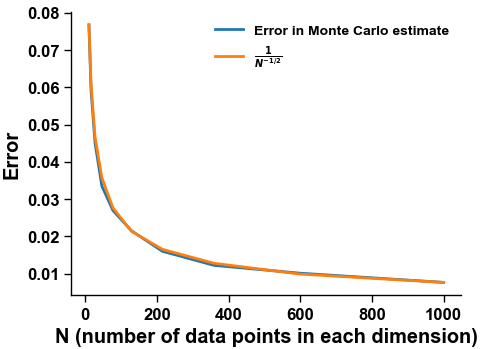

In [4]:
plt.plot(N, e_mc)
plt.plot(N, (e_mc[0]*np.sqrt(N[0]))/np.sqrt(N))
plt.legend(['Error in Monte Carlo estimate', r"$\frac{1}{N^{-1/2}}$"])
plt.xlabel('N (number of data points in each dimension)')
plt.ylabel('Error')
plt.show()

那么，为什么会有人使用蒙特卡罗积分法呢？显然，随着样本点数量的增加，黎曼估计值的下降速度会更快。蒙特卡洛积分的误差率与维数无关是怎么回事？随着维数的增加，蒙特卡罗误差和黎曼误差的变化是否不同？让我们来看看这个问题。

首先，我们需要了解如果我们进入更高维的空间，黎曼误差会如何变化。让 $N$ 表示沿每个轴的点数；因此，如果我们有 $D$ 维，我们就有 $N^D$ 样本点。在 D 维空间中，误差的变化是 $O(\frac{1}{N})$，还是 $O(\frac{1}{N^D})$？让我们试试 $D=2$。

In [5]:
D = 2
N = np.array([5, 10, 20 , 50, 100])

F_rd = np.zeros(5)
for i,n in enumerate(N):
    F_rd[i] = riemann(n, D)
    
e_rd = np.abs(F_rd - 2.0/3.0)

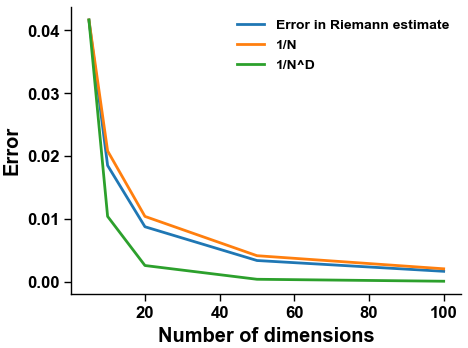

In [7]:
plt.plot(N, e_rd)
plt.plot(N, (e_rd[0]*N[0])/(N))
plt.plot(N, (e_rd[0]*(N[0]**D))/(N**D))
plt.legend(['Error in Riemann estimate', '1/N', '1/N^D'])
plt.xlabel('Number of dimensions')
plt.ylabel('Error')
plt.show()

看起来更像是 $O(\frac{1}{N})$。让我们再看看 $D=3$。

In [8]:
D = 3
N = np.array([3, 6, 12 , 25, 50])

F_rd = np.zeros(5)
for i,n in enumerate(N):
    F_rd[i] = riemann(n, D)
    
e_rd = np.abs(F_rd - 2.0/3.0)

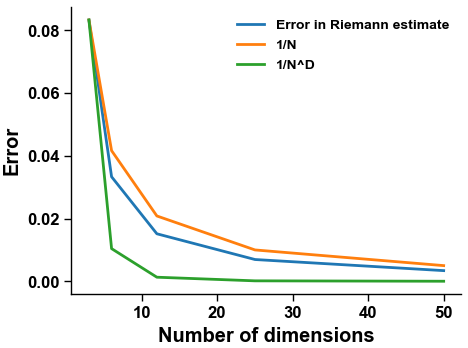

In [9]:
plt.plot(N, e_rd)
plt.plot(N, (e_rd[0]*N[0])/(N))
plt.plot(N, (e_rd[0]*(N[0]**D))/(N**D))
plt.legend(['Error in Riemann estimate', '1/N', '1/N^D'])
plt.xlabel('Number of dimensions')
plt.ylabel('Error')
plt.show()

同样，它看起来更像是 $O(\frac{1}{N})$。另一种方法是看我们改变维数时误差是如何变化的。

In [10]:
D = [1,2,3,4,5]
N = 10

F_rn = np.zeros(5)
for i,d in enumerate(D):
    F_rn[i] = riemann(N, d)
    
e_rn = np.abs(F_rn - 2.0/3.0)

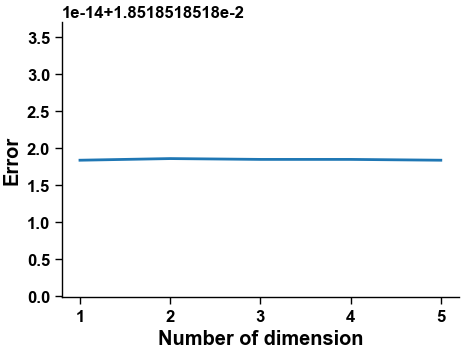

In [12]:
plt.plot(D, e_rn)
plt.ylabel('Error')
plt.xlabel('Number of dimension')
plt.show()

很明显，如果我们保持每个维度的点数不变，误差就会保持不变。换句话说，黎曼误差表现为 $O(\frac{1}{N})$。这也意味着，如果我们保持样本（网格）点数不变，黎曼误差就会增加。

In [11]:
D = np.array([1, 2, 4, 8, 16])
# we need to keep the number of samples constant across dimensions
N = np.array([65536, 256, 16, 4, 2])
F_rc = np.zeros(5)
for i,(n,d) in enumerate(zip(N,D)):
    F_rc[i] = riemann(n, d)
    
# error in riemann estimate
e_rc = np.abs(F_rc - (2.0 / 3.0))
print(e_rc)

[2.54317032e-06 6.53594771e-04 1.11111111e-02 5.55555556e-02
 1.66666667e-01]


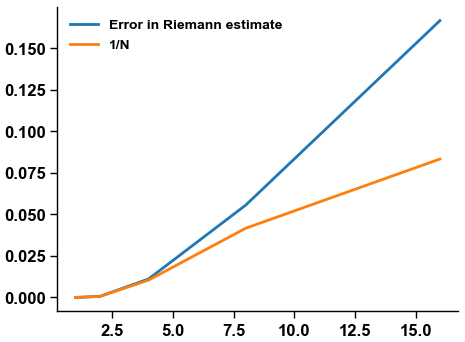

In [12]:
plt.plot(D, e_rc)
plt.plot(D, (e_rc[0]*N[0])/N)
plt.legend(['Error in Riemann estimate', '1/N'])
plt.ylabel('Error')
plt.xlabel('Error')
plt.show()

虽然增加幅度似乎大于 $O(\frac{1}{N})$。

不过，对我们来说，重要的是比较蒙特卡罗误差与黎曼误差的变化。让我们看看在 $D=2$ 时，蒙特卡罗误差随 $N$ 的变化情况。请记住，$N$ 是每个维度的点数。

In [13]:
repeats = 100
D = 2
N = np.array([5, 10, 20 , 50, 100])
e_mcd2 = np.zeros(5)
for i,n in enumerate(N):
    for r in range(repeats):
        e_mcd2[i] += np.abs(monte_carlo(n, D) - (2.0/3.0))

e_mcd2 /= repeats
print(e_mcd2)

[0.03480439 0.01795147 0.00810035 0.00341362 0.00169278]


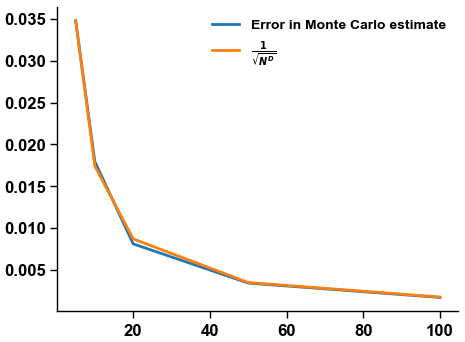

In [14]:
plt.plot(N, e_mcd2)
plt.plot(N, (e_mcd2[0]*(N[0]))/N)
plt.legend(['Error in Monte Carlo estimate', r"$\frac{1}{\sqrt{N^D}}$"])
plt.ylabel('Error')
plt.xlabel('')
plt.show()

啊哈！请注意，蒙特卡罗误差的变化是 $O(\frac{1}{\sqrt{N^D}})$，在这种情况下是 $O(\frac{1}{N})$。换句话说，蒙特卡洛误差取决于样本点的总数，而不是每个维度的点数(就像黎曼误差那样)。例如，如果我们在增加维数时保持 $N$ 不变，蒙特卡罗误差就会减小。请记住，只要 $N$ 保持不变，黎曼误差就不会改变。

In [15]:
repeats = 100
D = np.array([1, 2, 3, 4, 5])
# we need to keep the number of samples constant across dimensions
N = 10
e_mcd = np.zeros(5)
for i,d in enumerate(D):
    for r in range(repeats):
        e_mcd[i] += np.abs(monte_carlo(N, d) - (2.0/3.0))

e_mcd /= repeats
print(e_mcd)

[0.08674144 0.01842745 0.00426346 0.00130174 0.00033948]


In [145]:
plt.plot(D, e_mcd)
D = np.array([1, 2, 3, 4, 5])
plt.plot(D, (e_mcd[0]*np.sqrt(N))/np.sqrt(N**D))
plt.legend(['Error in Monte Carlo estimate', r"$\frac{1}{\sqrt{N^D}}$"])
plt.show()

请注意蒙特卡罗误差是如何随着 $\frac{1}{\sqrt{N^D}}$ 的变化而变化的。因此，我们只需要恒定的样本点数就能达到恒定的误差率。相比之下，对于黎曼积分，我们需要保持每个维度的点数不变，这意味着随着 $D$ 的增加，样本点数会呈指数增长。

概括地说，对于蒙特卡罗积分，误差随 $O(\frac{1}{\sqrt{N^D}})$变化，其中 $N$ 是每个维度的点数。相反，对于黎曼积分，误差变化为 $O(\frac{1}{N})$。因此，如果我们保持样本点总数不变，黎曼估计值会随着 $D$ 的增加而变差，而蒙特卡罗误差应该保持不变。